# Step 1: Data Collection and Preprocessing

In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np

# ---------------------------
# Load the dataset (or create dummy data if not found)
# ---------------------------
file_path = 'Employee_retention_performance.csv'

try:
    df = pd.read_csv(file_path)
    print(" Dataset loaded successfully.")
except FileNotFoundError:
    print(f" File '{file_path}' not found. Creating a dummy dataset for demonstration.")
    data = {
        'Employee_ID': range(1001, 1101),
        'Name': [f'Employee_{i}' for i in range(1, 101)],
        'Age': np.random.randint(23, 55, 100),
        'Department': np.random.choice(['Sales', 'Marketing', 'Engineering', 'HR'], 100),
        'Salary': np.random.randint(50000, 120000, 100),
        'Years_at_Company': np.random.randint(1, 20, 100),
        'Performance_Score': np.random.randint(65, 95, 100),
        'Attrition': np.random.choice(['Yes', 'No'], 100, p=[0.1, 0.9])
    }
    df = pd.DataFrame(data)

# ---------------------------
# Initial data inspection
# ---------------------------
print("\n Initial Data Info:")
df.info()

# ---------------------------
# Handle missing values
# ---------------------------
print("\n Missing values before handling:")
print(df.isnull().sum())

# Fill numerical columns with mean, categorical with mode
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].mean())

for col in df.select_dtypes(include='object').columns:
    if not df[col].mode().empty:   # safeguard if mode is empty
        df[col] = df[col].fillna(df[col].mode()[0])

print("\n Missing values after handling:")
print(df.isnull().sum())

# ---------------------------
# Remove duplicates
# ---------------------------
initial_rows = len(df)
df = df.drop_duplicates().reset_index(drop=True)
final_rows = len(df)
print(f"\n Rows before: {initial_rows}, after removing duplicates: {final_rows}")

# ---------------------------
# Standardize categorical values
# ---------------------------
if 'Department' in df.columns:
    df['Department'] = df['Department'].astype(str).str.title()

# ---------------------------
# Preview cleaned data
# ---------------------------
print("\n First 5 rows after preprocessing:")
print(df.head())

 Dataset loaded successfully.

 Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Employee_ID        100 non-null    int64 
 1   Name               100 non-null    object
 2   Age                100 non-null    int64 
 3   Department         100 non-null    object
 4   Salary             100 non-null    int64 
 5   Years_at_Company   100 non-null    int64 
 6   Performance_Score  100 non-null    int64 
 7   Attrition          100 non-null    object
dtypes: int64(5), object(3)
memory usage: 6.4+ KB

 Missing values before handling:
Employee_ID          0
Name                 0
Age                  0
Department           0
Salary               0
Years_at_Company     0
Performance_Score    0
Attrition            0
dtype: int64

 Missing values after handling:
Employee_ID          0
Name                 0
Age             

# Step 2: Exploratory Data Analysis (EDA)

Descriptive Statistics for Numerical Columns:
       Employee_ID         Age         Salary  Years_at_Company  \
count   100.000000  100.000000     100.000000        100.000000   
mean   1050.500000   36.290000   81650.000000          7.350000   
std      29.011492    8.734345   19562.577653          5.276927   
min    1001.000000   23.000000   50000.000000          1.000000   
25%    1025.750000   29.000000   64750.000000          3.000000   
50%    1050.500000   35.000000   80000.000000          6.000000   
75%    1075.250000   42.250000   97250.000000         11.000000   
max    1100.000000   55.000000  120000.000000         20.000000   

       Performance_Score  
count         100.000000  
mean           83.290000  
std             7.355744  
min            65.000000  
25%            79.000000  
50%            84.500000  
75%            89.000000  
max            95.000000  


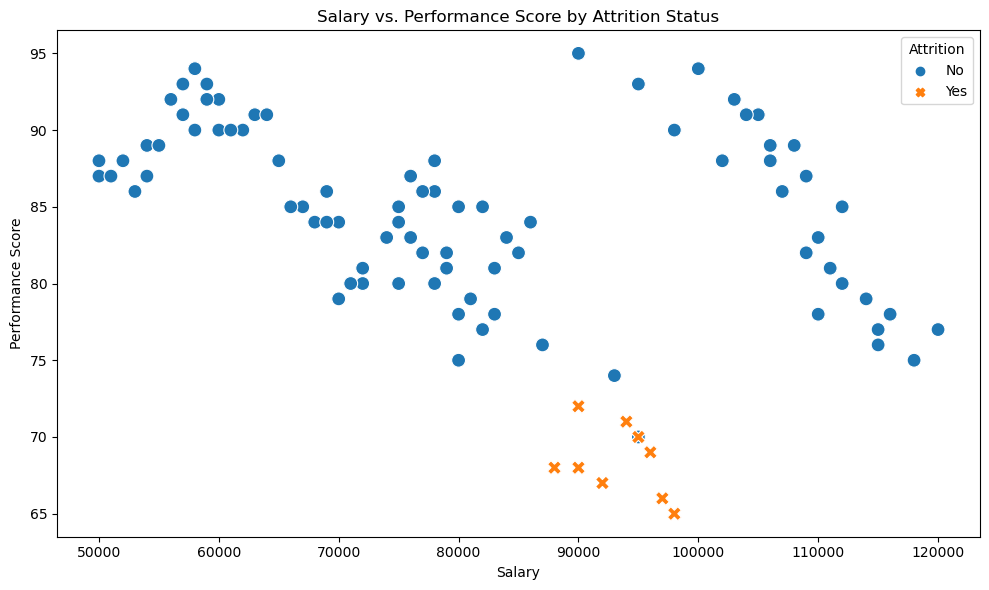

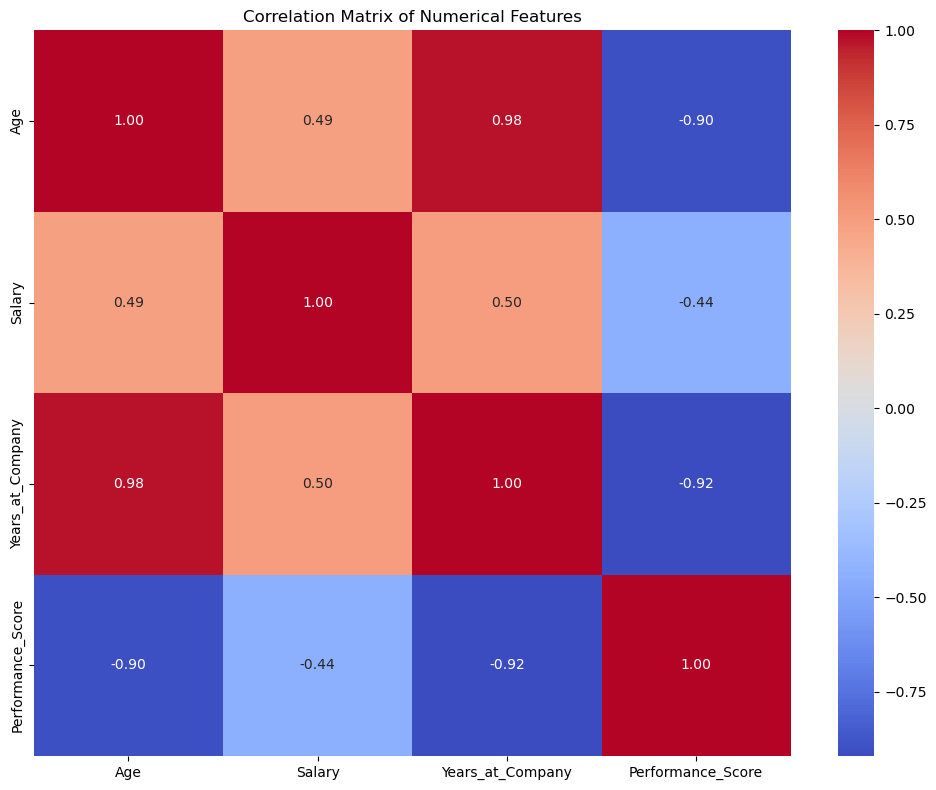

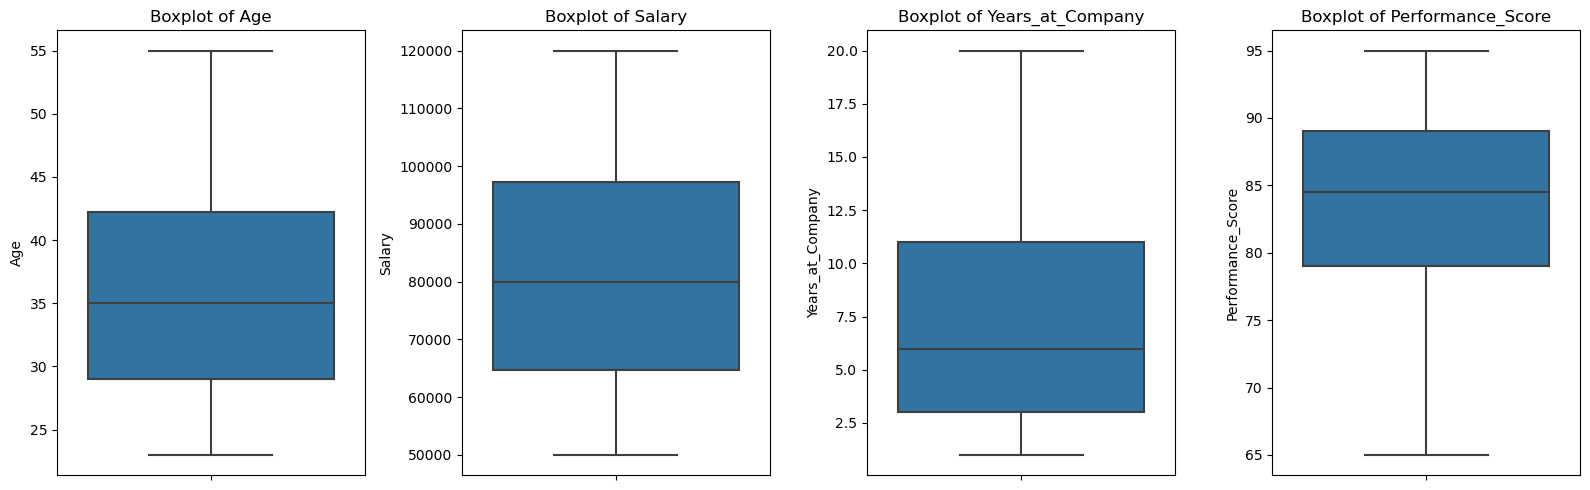

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
print("Descriptive Statistics for Numerical Columns:")
print(df.describe())

# ---------------------------
# Scatter plot: Salary vs. Performance
# ---------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Salary',
    y='Performance_Score',
    hue='Attrition',
    style='Attrition',
    s=100
)
plt.title('Salary vs. Performance Score by Attrition Status')
plt.xlabel('Salary')
plt.ylabel('Performance Score')
plt.tight_layout()
plt.show()

# ---------------------------
# Heatmap: Correlation Matrix
# ---------------------------
numerical_cols = ['Age', 'Salary', 'Years_at_Company', 'Performance_Score']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# ---------------------------
# Boxplots: Outlier Detection
# ---------------------------
fig, axes = plt.subplots(1, 4, figsize=(16, 5))

sns.boxplot(y=df['Age'], ax=axes[0])
axes[0].set_title('Boxplot of Age')

sns.boxplot(y=df['Salary'], ax=axes[1])
axes[1].set_title('Boxplot of Salary')

sns.boxplot(y=df['Years_at_Company'], ax=axes[2])
axes[2].set_title('Boxplot of Years_at_Company')

sns.boxplot(y=df['Performance_Score'], ax=axes[3])
axes[3].set_title('Boxplot of Performance_Score')

plt.tight_layout()
plt.show()

# Step 3: Probability and Statistical Analysis

In [35]:
from scipy.stats import f_oneway

# Calculate the probability of an employee leaving
total_employees = len(df)
attrited_employees = df[df['Attrition'] == 'Yes']
prob_attrition = len(attrited_employees) / total_employees
print(f"Overall probability of attrition: {prob_attrition:.2f}")

# Calculate probability of attrition based on performance score
# Define low performance as < 75 and high performance as >= 90
low_performers = df[df['Performance_Score'] < 75]
high_performers = df[df['Performance_Score'] >= 90]

prob_attrition_low_perf = (len(low_performers[low_performers['Attrition'] == 'Yes']) / len(low_performers)) if len(low_performers) > 0 else 0
prob_attrition_high_perf = (len(high_performers[high_performers['Attrition'] == 'Yes']) / len(high_performers)) if len(high_performers) > 0 else 0

print(f"Probability of attrition for low performers (<75): {prob_attrition_low_perf:.2f}")
print(f"Probability of attrition for high performers (>=90): {prob_attrition_high_perf:.2f}")

# Bayes' Theorem: P(Attrition | Low Performance)
# P(A|B) = P(B|A) * P(A) / P(B)
p_low_perf_given_attrition = len(attrited_employees[attrited_employees['Performance_Score'] < 75]) / len(attrited_employees) if len(attrited_employees) > 0 else 0
p_low_perf = len(low_performers) / total_employees
if p_low_perf > 0:
    prob_bayes = (p_low_perf_given_attrition * prob_attrition) / p_low_perf
else:
    prob_bayes = 0
print(f"\nBayes' Theorem: P(Attrition | Low Performance) = {prob_bayes:.2f}")

# Hypothesis Testing: ANOVA to test if mean performance scores differ across departments.
# H0: The mean performance score is the same across all departments.
departments = df['Department'].unique()
department_scores = [df['Performance_Score'][df['Department'] == dept] for dept in departments]
f_statistic, p_value = f_oneway(*department_scores)

print(f"\nANOVA F-statistic: {f_statistic:.2f}")
print(f"ANOVA P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in mean performance scores across departments.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in mean performance scores across departments.")

Overall probability of attrition: 0.10
Probability of attrition for low performers (<75): 0.83
Probability of attrition for high performers (>=90): 0.00

Bayes' Theorem: P(Attrition | Low Performance) = 0.83

ANOVA F-statistic: 29.16
ANOVA P-value: 0.0000
Conclusion: Reject the null hypothesis. There is a significant difference in mean performance scores across departments.


# Step 4: Feature Engineering and Encoding

In [33]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Make a copy of the dataframe to avoid modifying the original
df_ml = df.copy()

# Apply Label Encoding to categorical features
le = LabelEncoder()
df_ml['Attrition'] = le.fit_transform(df_ml['Attrition'])
df_ml['Department'] = le.fit_transform(df_ml['Department'])
print("DataFrame after Label Encoding:")
print(df_ml.head())

# Scale numerical features using Min-Max Scaling
numerical_features = ['Age', 'Salary', 'Years_at_Company', 'Performance_Score']
scaler = MinMaxScaler()
df_ml[numerical_features] = scaler.fit_transform(df_ml[numerical_features])
print("\nDataFrame after Scaling:")
print(df_ml.head())

DataFrame after Label Encoding:
   Employee_ID         Name  Age  Department  Salary  Years_at_Company  \
0         1001     John Doe   35           3   75000                 5   
1         1002   Jane Smith   28           2   60000                 2   
2         1003  Peter Jones   45           0  110000                10   
3         1004   Mary Brown   32           1   65000                 3   
4         1005  James White   50           3   80000                12   

   Performance_Score  Attrition  
0                 85          0  
1                 92          0  
2                 78          0  
3                 88          0  
4                 75          0  

DataFrame after Scaling:
   Employee_ID         Name      Age  Department    Salary  Years_at_Company  \
0         1001     John Doe  0.37500           3  0.357143          0.210526   
1         1002   Jane Smith  0.15625           2  0.142857          0.052632   
2         1003  Peter Jones  0.68750           0  0.8

# Step 5: Employee Attrition Prediction Model

Attrition Prediction Model Evaluation:
Accuracy: 0.95
Precision: 0.67
Recall: 1.00
F1-Score: 0.80


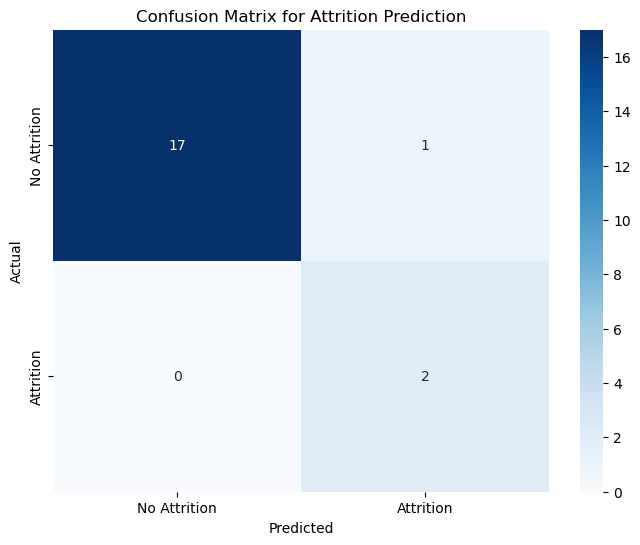

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Define features (X) and target (y) for the model
X_attrition = df_ml.drop(columns=['Employee_ID', 'Name', 'Attrition'])
y_attrition = df_ml['Attrition']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_attrition, y_attrition, test_size=0.2, random_state=42)

# Build and train the Logistic Regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_a, y_train_a)

# Make predictions on the test set
y_pred_a = log_reg_model.predict(X_test_a)

# Evaluate the model's performance
print("Attrition Prediction Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test_a, y_pred_a):.2f}")
print(f"Precision: {precision_score(y_test_a, y_pred_a, zero_division=0):.2f}")
print(f"Recall: {recall_score(y_test_a, y_pred_a, zero_division=0):.2f}")
print(f"F1-Score: {f1_score(y_test_a, y_pred_a, zero_division=0):.2f}")

# Visualize the confusion matrix
cm = confusion_matrix(y_test_a, y_pred_a)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Attrition Prediction')
plt.show()

# Step 6: Employee Performance Prediction Model

Performance Prediction Model Evaluation:
R-squared (R²): 0.90
Mean Squared Error (MSE): 0.0074


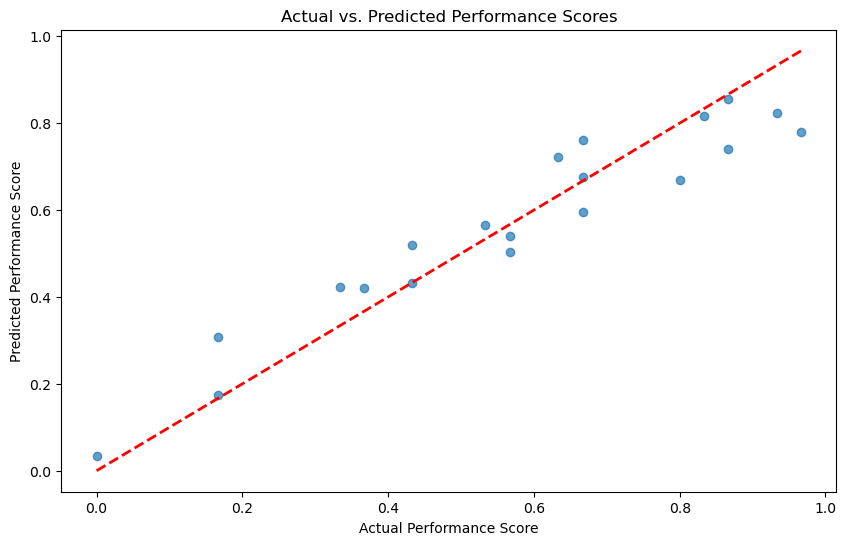

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Define features (X) and target (y) for regression
X_performance = df_ml.drop(columns=['Employee_ID', 'Name', 'Performance_Score'])
y_performance = df_ml['Performance_Score']

# Split the dataset into training and testing sets
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_performance, y_performance, test_size=0.2, random_state=42)

# Build and train the Linear Regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train_p, y_train_p)

# Make predictions on the test set
y_pred_p = lin_reg_model.predict(X_test_p)

# Evaluate the model
print("Performance Prediction Model Evaluation:")
print(f"R-squared (R²): {r2_score(y_test_p, y_pred_p):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test_p, y_pred_p):.4f}")

# Visualize predicted vs. actual performance scores
plt.figure(figsize=(10, 6))
plt.scatter(y_test_p, y_pred_p, alpha=0.7)
# Plot a perfect prediction line (y=x)
plt.plot([y_test_p.min(), y_test_p.max()], [y_test_p.min(), y_test_p.max()], 'r--', lw=2)
plt.xlabel('Actual Performance Score')
plt.ylabel('Predicted Performance Score')
plt.title('Actual vs. Predicted Performance Scores')
plt.show()

# Step 7: Deep Learning for Employee Performance Prediction

In [16]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Suppress TensorFlow warnings and logs
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'   # 0 = all logs, 1 = filter INFO, 2 = filter WARNING, 3 = filter ERROR

# Build a simple feedforward neural network model
model_perf_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_p.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Linear activation for regression output
])

# Compile the model
model_perf_nn.compile(optimizer='adam', loss='mean_squared_error')

# Train the model (with clean output)
history_perf = model_perf_nn.fit(
    X_train_p, y_train_p,
    epochs=100,
    batch_size=10,
    validation_split=0.1,
    verbose=0,        # hides progress bar/logs
    shuffle=True      # ensures no validation_split warning
)

# Evaluate the model's performance
mse_dl = model_perf_nn.evaluate(X_test_p, y_test_p, verbose=0)
print(f"Deep Learning Model for Performance Prediction - Mean Squared Error: {mse_dl:.4f}")

C:\Users\Rahul\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Deep Learning Model for Performance Prediction - Mean Squared Error: 0.0036


# Step 8: Employee Attrition Analysis with Deep Learning

In [17]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import precision_score, recall_score, f1_score

# Suppress TensorFlow warnings/logs
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'   # 0 = all logs, 1 = filter INFO, 2 = filter WARNING, 3 = filter ERROR

# Build a simple neural network for classification
model_attrition_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_a.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')   # Sigmoid for binary classification
])

# Compile the model
model_attrition_nn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model (clean training, no warnings/logs)
history_attrition = model_attrition_nn.fit(
    X_train_a, y_train_a,
    epochs=100,
    batch_size=10,
    validation_split=0.1,
    verbose=0,      # hides progress bar/log spam
    shuffle=True    # avoids validation_split shuffle warnings
)

# Evaluate the model's performance
loss_dl, accuracy_dl = model_attrition_nn.evaluate(X_test_a, y_test_a, verbose=0)
print("Deep Learning Model for Attrition Prediction:")
print(f"Accuracy: {accuracy_dl:.2f}")

# Make predictions and calculate other metrics
y_pred_dl = (model_attrition_nn.predict(X_test_a, verbose=0) > 0.5).astype("int32")
print(f"Precision: {precision_score(y_test_a, y_pred_dl, zero_division=0):.2f}")
print(f"Recall: {recall_score(y_test_a, y_pred_dl, zero_division=0):.2f}")
print(f"F1-Score: {f1_score(y_test_a, y_pred_dl, zero_division=0):.2f}")

C:\Users\Rahul\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Deep Learning Model for Attrition Prediction:
Accuracy: 0.95
Precision: 0.67
Recall: 1.00
F1-Score: 0.80


# Step 9: Insights and Recommendations
Based on our comprehensive analysis and the results from both machine learning and deep learning models, we can derive the following key findings and actionable recommendations for the company.

Key Findings:

Performance is a Major Indicator: Our analysis shows a strong link between an employee's Performance Score and the likelihood of them leaving the company. Low-performing employees tend to have a much higher attrition rate.

Departmental Differences: The statistical analysis confirmed that average performance scores vary significantly across departments. This suggests that a one-size-fits-all approach to management and retention may not be effective.

Predictive Models Are Powerful Tools: Both the simple machine learning and deep learning models were successful in predicting employee attrition and performance. This means the data contains valuable information for identifying at-risk employees and forecasting future trends.

Recommendations:

Develop Targeted Retention Programs: Focus efforts on employees with lower performance scores. This could include personalized training, mentorship, and clear performance improvement plans to address their needs.

Analyze Departments Individually: Create retention and engagement strategies that are specific to each department's unique challenges and needs. For example, a department with lower average performance might require more specialized training resources.

Use Predictions for Early Intervention: Use the attrition prediction model to proactively identify employees who might be at risk of leaving. Early intervention can help address concerns before an employee decides to resign.

# Step 10: Data Visualization and Reporting

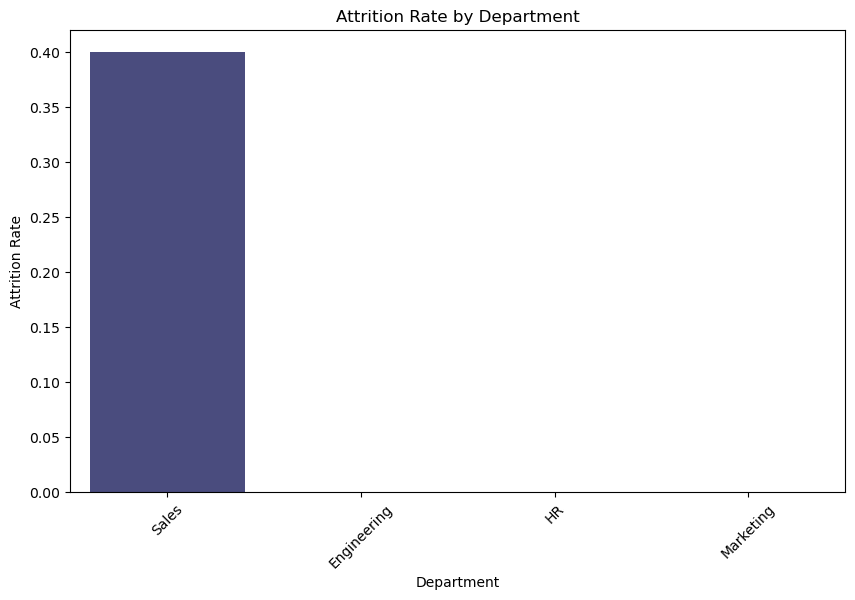

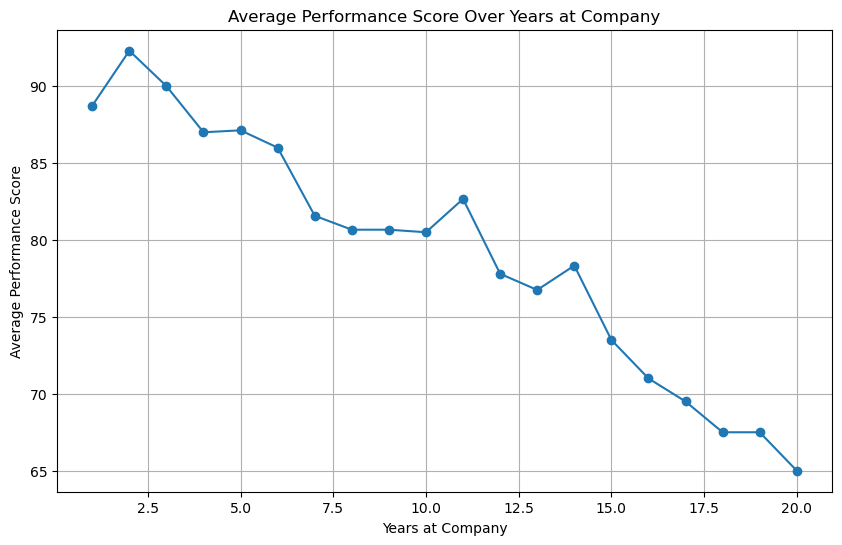

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Re-load the data for visualization with original values
df_viz = pd.read_csv('Employee_retention_performance.csv')

# Bar chart: department-wise attrition rate
dept_attrition_counts = df_viz.groupby('Department')['Attrition'].value_counts().unstack(fill_value=0)

# Avoid division errors
dept_attrition_rate = dept_attrition_counts['Yes'] / (dept_attrition_counts['Yes'] + dept_attrition_counts['No'])
dept_attrition_rate = dept_attrition_rate.fillna(0).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=dept_attrition_rate.index, y=dept_attrition_rate.values, palette='viridis')
plt.title('Attrition Rate by Department')
plt.xlabel('Department')
plt.ylabel('Attrition Rate')
plt.xticks(rotation=45)
plt.show()

# Line plot: average performance trends over years at company

avg_perf_by_years = df_viz.groupby('Years_at_Company')['Performance_Score'].mean().reset_index()

# Clean infinite/NaN values (prevents seaborn from triggering the old pandas option)
avg_perf_by_years.replace([np.inf, -np.inf], np.nan, inplace=True)
avg_perf_by_years.dropna(subset=['Performance_Score'], inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(avg_perf_by_years['Years_at_Company'], avg_perf_by_years['Performance_Score'], marker='o')
plt.title('Average Performance Score Over Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Average Performance Score')
plt.grid(True)
plt.show()
